In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('직무능력평가.csv')
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [4]:
df_x = df.drop('EVAL', axis = 1)
df_y = df['EVAL']

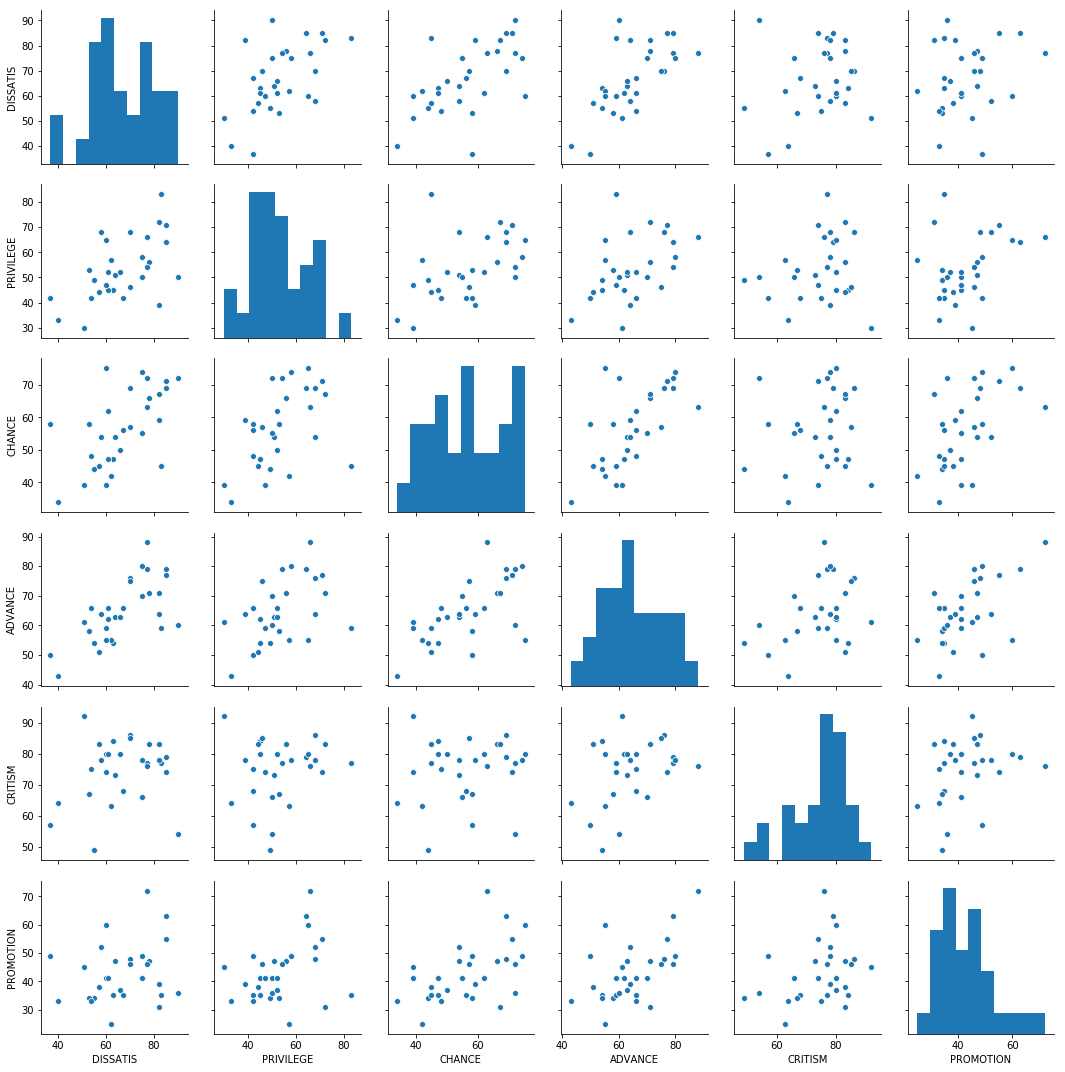

In [5]:
sns.pairplot(df_x)

In [6]:
df_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [7]:
x_cols = df_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_x)
print(nd_scaled[:5])
print(nd_scaled.shape)

[[-1.19166169 -1.92300586 -1.50494461 -0.35542617  1.77141034  0.20430138]
 [-0.19861028 -0.17733772 -0.20508842 -0.15977874 -0.18159526  0.4020124 ]
 [ 0.25972114  1.23582221  1.09476777  1.11192959  1.15467173  0.50086791]
 [-0.27499885 -0.67610004 -0.81168798 -1.0401922   0.9490922  -0.78425369]
 [ 0.87082969  0.23829756  0.83479653  0.622811    0.84630243  0.4020124 ]]
(30, 6)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
print(df_scaled.head().round(3))
print(df_scaled.describe().round(3))

   DISSATIS  PRIVILEGE  CHANCE  ADVANCE  CRITISM  PROMOTION
0    -1.192     -1.923  -1.505   -0.355    1.771      0.204
1    -0.199     -0.177  -0.205   -0.160   -0.182      0.402
2     0.260      1.236   1.095    1.112    1.155      0.501
3    -0.275     -0.676  -0.812   -1.040    0.949     -0.784
4     0.871      0.238   0.835    0.623    0.846      0.402
       DISSATIS  PRIVILEGE  CHANCE  ADVANCE  CRITISM  PROMOTION
count    30.000     30.000  30.000   30.000   30.000     30.000
mean      0.000     -0.000  -0.000   -0.000    0.000      0.000
std       1.017      1.017   1.017    1.017    1.017      1.017
min      -2.261     -1.923  -1.938   -2.116   -2.649     -1.773
25%      -0.619     -0.676  -0.812   -0.624   -0.567     -0.784
50%      -0.122     -0.136   0.012   -0.111    0.281     -0.191
75%       0.794      0.779   0.900    0.623    0.538      0.476
max       1.787      2.483   1.615    2.286    1.771      2.873


In [10]:
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)
print(nd_pca[:5])
print(nd_pca.shape)

[[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
(30, 6)


In [12]:
df_pca = pd.DataFrame(nd_pca, columns = ['Prin' + str(number) for number in range(1, 7)])
df_pca.head()

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [13]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,7)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


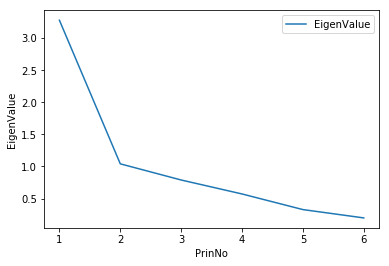

In [15]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = 'EigenValue')
plt.ylabel('EigenValue')
plt.xlabel('PrinNo')
plt.legend()

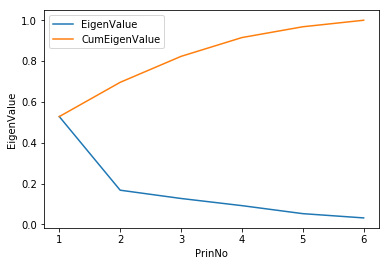

In [16]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'], label = 'EigenValue')
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label = 'CumEigenValue')
plt.ylabel('EigenValue')
plt.xlabel('PrinNo')
plt.legend(loc = 'best')

In [18]:
x_cols = pd.DataFrame({'Feature':df_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, columns = ['Prin' + str(number) for number in range(1, 7)],)], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


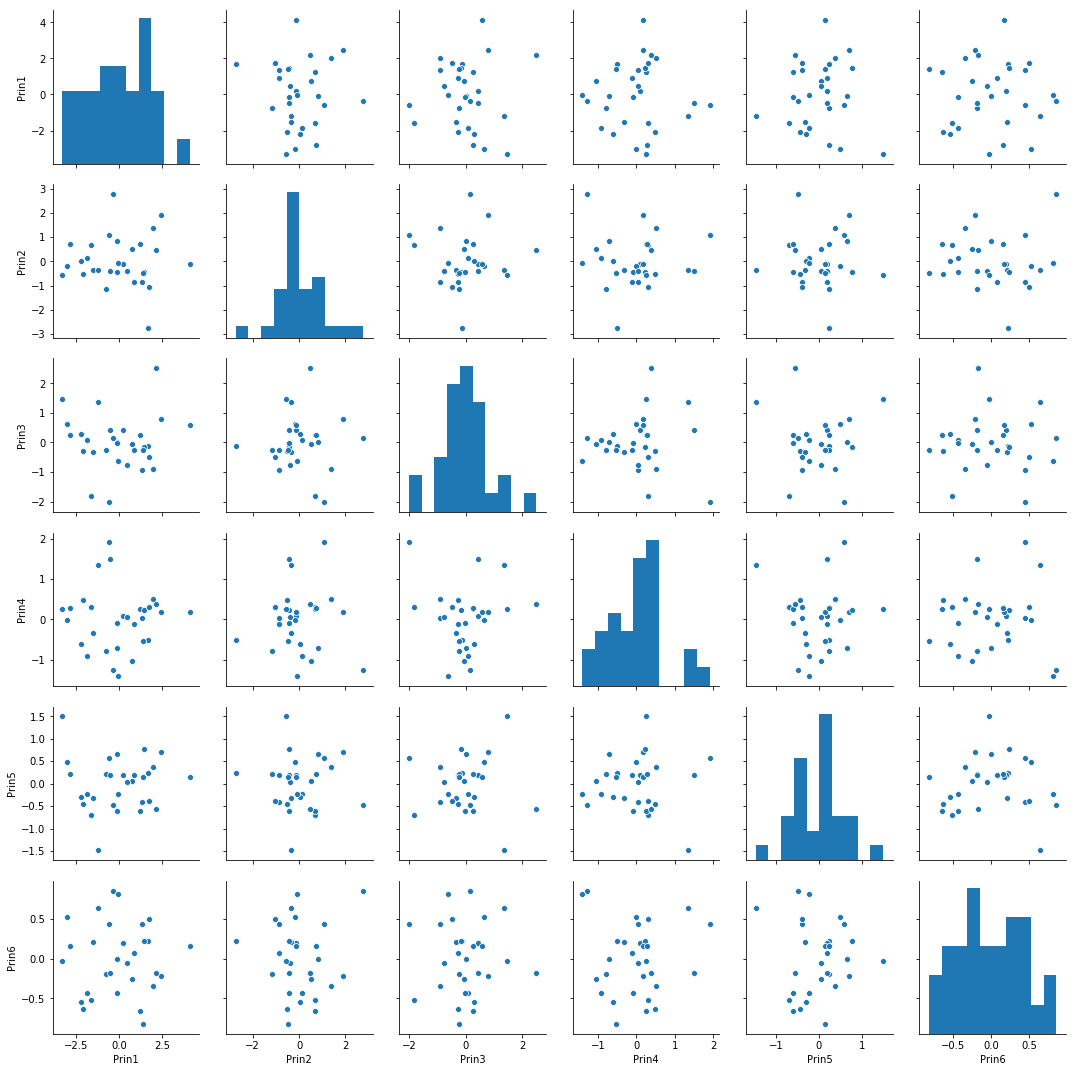

In [19]:
sns.pairplot(df_pca)
df_pca.corr().round(3)


In [21]:
df_x

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47
5,55,49,44,54,49,34
6,67,42,56,66,68,35
7,75,50,55,70,66,41
8,82,72,67,71,83,31
9,61,45,47,62,80,41


In [22]:
df_raw_x_const

,const,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,1.0,51,30,39,61,92,45
1,1.0,64,51,54,63,73,47
2,1.0,70,68,69,76,86,48
3,1.0,63,45,47,54,84,35
4,1.0,78,56,66,71,83,47
5,1.0,55,49,44,54,49,34
6,1.0,67,42,56,66,68,35
7,1.0,75,50,55,70,66,41
8,1.0,82,72,67,71,83,31
9,1.0,61,45,47,62,80,41


In [24]:
df_raw_x_const = sm.add_constant(df_x)
reg_model = sm.OLS(df_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 09 May 2019   Prob (F-statistic):           1.24e-05
Time:                        11:16:05   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [26]:
x_var = ['Prin'+str(number) for number in range(1, 4)]
df_pca_const = sm.add_constant(df_pca[x_var])
reg_model = sm.OLS(df_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 09 May 2019   Prob (F-statistic):           1.02e-05
Time:                        11:17:53   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

In [27]:
df = pd.read_csv('IRIS.csv')
df.isnull().sum()

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

In [28]:
df.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
df_raw_x = df.drop('SPECIES', axis = 1)
df_raw_y = df['SPECIES']
df_raw_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


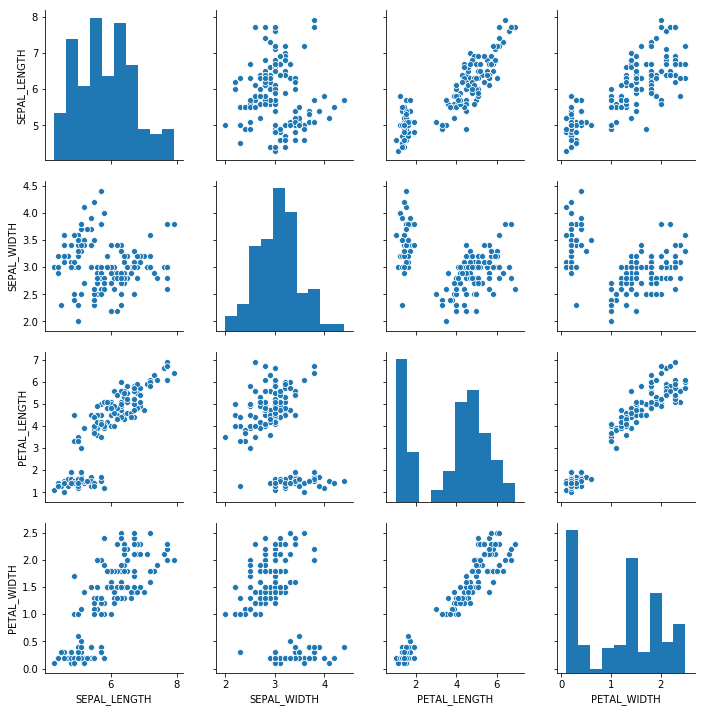

In [32]:
sns.pairplot(df_raw_x)

In [33]:
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [34]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print(f'Scaled Data:\n{nd_scaled[:5].round(3)}')
print(f'Shape:\n{nd_scaled.shape}')

Scaled Data:
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape:
(150, 4)


In [35]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


In [36]:
pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)
print(f'PCA Data:\n{nd_pca[:5]}')
print(f'Shape:\n{nd_pca.shape}')

PCA Data:
[[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
Shape:
(150, 4)


In [37]:
df_pca = pd.DataFrame(nd_pca, columns = ['Prin' + str(number) for number in range(1, 5)])
df_pca.head()

,Prin1,Prin2,Prin3,Prin4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [38]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1, 5)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValuesRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValuesRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


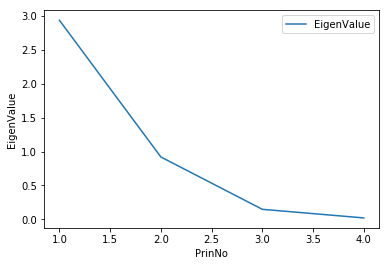

In [39]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = 'EigenValue')
plt.ylabel('EigenValue')
plt.xlabel('PrinNo')
plt.legend(loc = 'best')

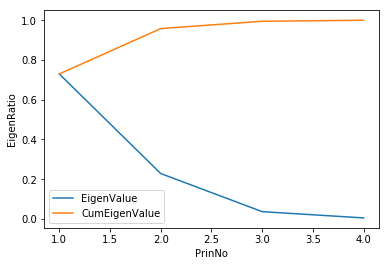

In [43]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValuesRatio'], label = 'EigenValue')
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label = 'CumEigenValue')
plt.ylabel('EigenRatio')
plt.xlabel('PrinNo')
plt.legend(loc='best')

In [44]:
x_cols = pd.DataFrame({'Feature':df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, columns = ['Prin' + str(number) for number in range(1, 5)])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


In [48]:
tmp = pd.concat([df_pca, df_raw_y], axis = 1)

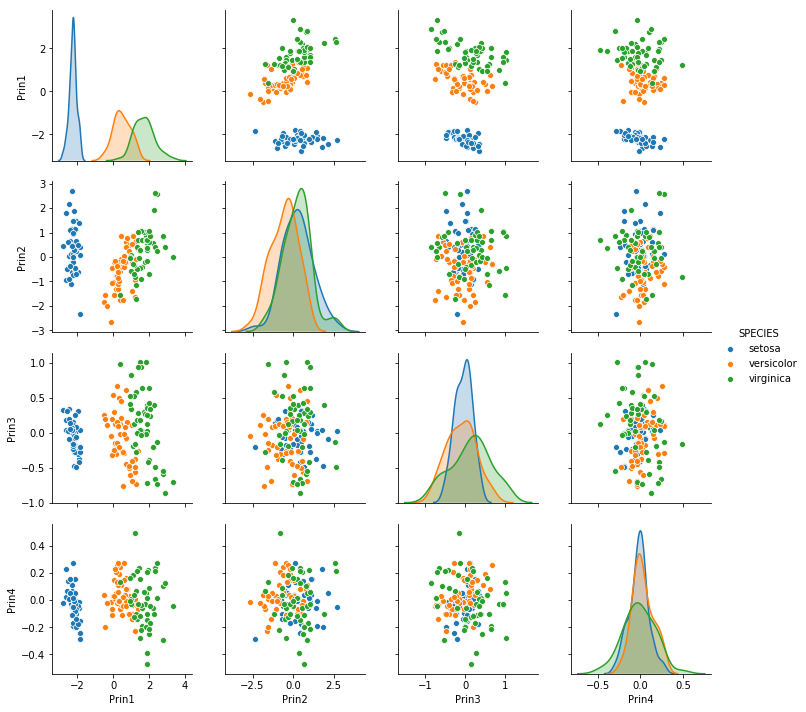

In [49]:
sns.pairplot(tmp, hue = 'SPECIES', )

In [46]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,0.0,-0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0
Prin3,-0.0,-0.0,1.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0


In [51]:
df_raw_y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# Python에서는 범주형 데이터에 대해서 주성분 분석을 통한 회귀분석 불가능
# df_raw_x_const = sm.add_constant(df_raw_x)
# reg_model = sm.OLS(df_raw_y, df_raw_x_const)
# reg_model = reg_model.fit()
# print(reg_model.summary())